In [211]:
from numpy import sqrt, arange, array, sin, cos, pi
from pylab import plot, xlabel, ylabel, show, title, legend
import vpython as vp

# Set up scene
scene = vp.canvas(background = vp.color.white, width=600, height=600)

def mag(r):
    return sqrt(r[0]**2 + r[1]**2)

def dire(r): #compute the direction vector r/|r|
    return r/mag(r)
    
def force(r1, r2, m1, m2): #find the force of r2 from r1
    r21 = r1 - r2 ##vector from 2 to 1
    return -G*m1*m2*dir(r21)/mag(r21)**2


t = 0
dt = 3600 #1 hour in seconds
Me = 5.972e24  #kg
Mm = 7.348e22 #kg
M1 = 1e10 #kg mass of object at L1
M4 = 1e10 #kg mass of object at L4
G = 6.67408e-11  #Nm^2/kg^2
R = 3.844e8 #m
w0 = sqrt(G*(Me+Mm)/(R**3))

re = array([-Mm*R/(Mm+Me), 0], float)
rm = array([Me*R/(Mm+Me), 0], float)

e4 = R*array([cos(60*pi/180), sin(60*pi/180)], float)
r1 = array([3.2170270438360560e8, 0], float) #vector to object at L1
r4 = re + e4

#add up forces exerted on the moon
fme = force(rm, re, Mm, Me) #Force of earth on moon
fm1 = force(rm, r1, Mm, M1) #Force of L1 sat on moon
fm4 = force(rm, r4, Mm, M4) #Force of L4 sat on moon
fmnet = fme + fm1 + fm4

#add up forces exerted on the earth
fem = force(re, rm, Me, Mm) #Force of moon on earth
fe1 = force(re, r1, Me, M1) #Force of L1 sat on earth
fe4 = force(re, r4, Me, M4) #Force of L4 sat on earth
fenet = fem + fe1 + fe4

#add up forces exerted on the L1 sat
f1e = force(r1, re, M1, Me) # Force of earth on L1 sat
f1m = force(r1, rm, M1, Mm) # Force of moon on L1 sat
f14 = force(r1, r4, M1, M4) # Force of L4 sat on L1 sat
f1net = f1e + f1m + f14

#add up forces exerted on the L4 sat
f4e = force(r4, re, M4, Me) # Force of earth on L4 sat
f4m = force(r4, rm, M4, Mm) # Force of moon on L4 sat
f41 = force(r4, r1, M4, M1) # Force of L1 sat on L4 sat
f4net = f4e + f4m + f41

ve = array([0, -w0*mag(re)], float) #velocity of earth
vm = array([0, w0*mag(rm)], float) #velocity of moon
v1 = array([0, w0*mag(r1)], float) #velocity of object at L1

v4 = w0*mag(r4)*array([-dir(r4)[1], dir(r4)[0]], float) #velocity of object at L4

print("Thus w = sqrt(mag(F_me)/(Mm*R)) = ", sqrt(mag(fme)/(Mm*R)), "rad/s")
print("Which can also be computed with sqrt(G(Me+Mm)/(R^3)) = ", sqrt(G*(Me+Mm)/(R**3)), "rad/s For Earth-Moon System")
print("Inital velocity for Earth = ", ve)
print("Inital velocity for Moon = ", vm)

repoints = [re]
vepoints = [ve]
aepoints = [fenet / Me]

rmpoints = [rm]
vmpoints = [vm]
ampoints = [fmnet / Mm]

r1points = [r1]
v1points = [v1]
a1points = [f1net / M1]

r4points = [r4]
v4points = [v4]
a4points = [f4net / M4]

e4points = [mag(r4 - re)]
m4points = [mag(r4 - rm)]
tpoints = [t]

# Perform half step forward for Verlet method
vmmid = vm + (fmnet / Mm)*0.5*dt
vemid = ve + (fenet / Me)*0.5*dt
v1mid = v1 + (f1net / M1)*0.5*dt
v4mid = v4 + (f4net / M4)*0.5*dt

norbit = 0

# Coordinate axes
axisRadius = 100000
axisColor = vp.vector(0.5, 0.5, 0.5)

xaxis = vp.cylinder(pos=vp.vector(-5,0,0), axis=vp.vector(1.5*R,0,0), radius = axisRadius, color=axisColor)
yaxis = vp.cylinder(pos=vp.vector(0,-5,0), axis=vp.vector(0,1.5*R,0), radius = axisRadius, color=axisColor)
zaxis = vp.cylinder(pos=vp.vector(0,0,-5), axis=vp.vector(0,0,1.5*R), radius = axisRadius, color=axisColor)
vp.label(pos=xaxis.pos + xaxis.axis, text='x', height=10, box=False)
vp.label(pos=yaxis.pos + yaxis.axis, text='y', height=10, box=False)
vp.label(pos=zaxis.pos + zaxis.axis, text='z', height=10, box=False)

#Objects in our scene
earth = vp.sphere(pos=vp.vector(re[0], re[1], 0), size=vp.vector(3e7,3e7,3e7), color=vp.color.green, make_trail=True)
moon = vp.sphere(pos=vp.vector(rm[0], rm[1], 0), size=vp.vector(1e7,1e7,1e7), color=vp.color.blue, make_trail=True)
satelite1 = vp.sphere(pos=vp.vector(r1[0], r1[1], 0), size=vp.vector(1e7,1e7,1e7), color=vp.color.cyan, make_trail=True)
satelite4 = vp.sphere(pos=vp.vector(r4[0], r4[1], 0), size=vp.vector(1e7,1e7,1e7), color=vp.color.red, make_trail=True)

while norbit < 6:
    vp.rate(20)
    yold = rm[1]
    
    # Verlet method for the moon
    re = re + vemid*dt
    rm = rm + vmmid*dt
    r1 = r1 + v1mid*dt
    r4 = r4 + v4mid*dt
    
    earth.pos = vp.vector(re[0], re[1], 0)
    moon.pos = vp.vector(rm[0], rm[1], 0)
    satelite1.pos = vp.vector(r1[0], r1[1], 0)
    satelite4.pos = vp.vector(r4[0], r4[1], 0)
    
    #Compute Moons acceleration vector
    #add up forces exerted on the moon
    fme = force(rm, re, Mm, Me) #Force of earth on moon
    fm1 = force(rm, r1, Mm, M1) #Force of L1 sat on moon
    fm4 = force(rm, r4, Mm, M4) #Force of L4 sat on moon
    fmnet = fme + fm1 + fm4
    am = fmnet / Mm #moons acceleration vector
    
    #Compute Earths acceleration vector
    #add up forces exerted on the earth
    fem = force(re, rm, Me, Mm) #Force of moon on earth
    fe1 = force(re, r1, Me, M1) #Force of L1 sat on earth
    fe4 = force(re, r4, Me, M4) #Force of L4 sat on earth
    fenet = fem + fe1 + fe4
    ae = fenet / Me #earths acceleration vector
    
    #Compute L1 sat acceleration vector
    #add up forces exerted on the L1 sat
    f1e = force(r1, re, M1, Me) # Force of earth on L1 sat
    f1m = force(r1, rm, M1, Mm) # Force of moon on L1 sat
    f14 = force(r1, r4, M1, M4) # Force of L4 sat on L1 sat
    f1net = f1e + f1m + f14
    a1 = f1net / M1
    
    #Compute L4 sat acceleration vector
    #add up forces exerted on the L4 sat
    f4e = force(r4, re, M4, Me) # Force of earth on L4 sat
    f4m = force(r4, rm, M4, Mm) # Force of moon on L4 sat
    f41 = force(r4, r1, M4, M1) # Force of L1 sat on L4 sat
    f4net = f4e + f4m + f41
    a4 = f4net / M4
    
    ve = vemid + ae*0.5*dt
    vm = vmmid + am*0.5*dt
    v1 = v1mid + a1*0.5*dt
    v4 = v4mid + a4*0.5*dt
    
    vemid = vemid + ae*dt
    vmmid = vmmid + am*dt
    v1mid = v1mid + a1*dt
    v4mid = v4mid + a4*dt
    
    t += dt
    
    repoints.append(re)
    vepoints.append(ve)
    aepoints.append(ae)
    
    rmpoints.append(rm)
    vmpoints.append(vm)
    ampoints.append(am)
    
    a1points.append(a1)
    a4points.append(a4)
    e4points.append(mag(r4 - re))
    m4points.append(mag(r4 - rm))
    tpoints.append(t)
    
    ynew = rm[1]
    if yold < 0 and ynew > 0:
        norbit += 1


<IPython.core.display.Javascript object>

Thus w = sqrt(mag(F_me)/(Mm*R)) =  2.648991319027756e-06 rad/s
Which can also be computed with sqrt(G(Me+Mm)/(R^3)) =  2.665238204196964e-06 rad/s For Earth-Moon System
Inital velocity for Earth =  [  0.         -12.45253491]
Inital velocity for Moon =  [   0.         1012.06503079]


The Earth is wobbling but is is minuscule on these scales. If you zoom in close enough in the vpython animation and tilt the perspective, you can see that Earth is never quite centered and wobbles about the z axis. To further show how much the Earth wobbles, I will plot how its center of mass orbits below:

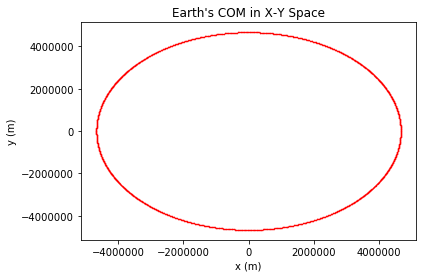

In [212]:
# plot results
plot([r[0] for r in repoints], [r[1] for r in repoints], "r.", markersize=0.5)
title("Earth's COM in X-Y Space")
xlabel("x (m)")
ylabel("y (m)")
show()

We can see from the cyan object that starts at L1, that it is not a stable circular orbit. Below I plot the acceleration of the L1 satellite over time and it starts off close very close to 0 (close to zero net force from both the Earth and Moon) but soon deviates causing it to leave L1 and persue another more stable orbit.

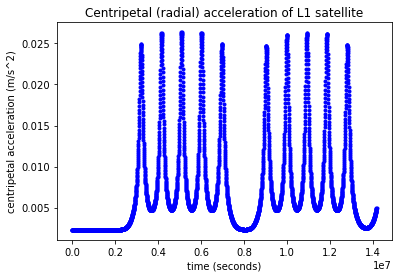

In [213]:
plot(tpoints,[mag(a) for a in a1points], "b.")
title("Centripetal (radial) acceleration of L1 satellite")
xlabel("time (seconds)")
ylabel("centripetal acceleration (m/s^2)")
show()

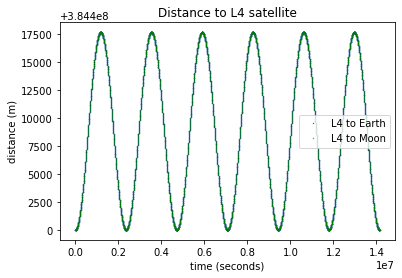

In [214]:
plot(tpoints,e4points, "b.", label="L4 to Earth", markersize=0.65)
plot(tpoints,m4points, "g.", label="L4 to Moon", markersize=0.65)
title("Distance to L4 satellite")
xlabel("time (seconds)")
ylabel("distance (m)")
legend()
show()

Notice that the distance from L4 satellite to Earth and moon is stable (they overlap)

Part d - same code as in part c except slight change in initial condition

In [207]:
from numpy import sqrt, arange, array, sin, cos, pi
from pylab import plot, xlabel, ylabel, show, title, legend
import vpython as vp

# Set up scene
scene = vp.canvas(background = vp.color.white, width=600, height=600)

def mag(r):
    return sqrt(r[0]**2 + r[1]**2)

def dire(r): #compute the direction vector r/|r|
    return r/mag(r)
    
def force(r1, r2, m1, m2): #find the force of r2 from r1
    r21 = r1 - r2 ##vector from 2 to 1
    return -G*m1*m2*dir(r21)/mag(r21)**2


t = 0
dt = 3600 #1 hour in seconds
Me = 5.972e24  #kg
Mm = 7.348e22 #kg
M1 = 1e10 #kg mass of object at L1
M4 = 1e10 #kg mass of object at L4
G = 6.67408e-11  #Nm^2/kg^2
R = 3.844e8 #m
w0 = sqrt(G*(Me+Mm)/(R**3))

re = array([-Mm*R/(Mm+Me), 0], float)
rm = array([Me*R/(Mm+Me), 0], float)

e4 = R*array([cos(60*pi/180), sin(60*pi/180)], float)
r1 = array([3.2170270438360560e8, 0], float) #vector to object at L1
r4 = re + e4

#add up forces exerted on the moon
fme = force(rm, re, Mm, Me) #Force of earth on moon
fm1 = force(rm, r1, Mm, M1) #Force of L1 sat on moon
fm4 = force(rm, r4, Mm, M4) #Force of L4 sat on moon
fmnet = fme + fm1 + fm4

#add up forces exerted on the earth
fem = force(re, rm, Me, Mm) #Force of moon on earth
fe1 = force(re, r1, Me, M1) #Force of L1 sat on earth
fe4 = force(re, r4, Me, M4) #Force of L4 sat on earth
fenet = fem + fe1 + fe4

#add up forces exerted on the L1 sat
f1e = force(r1, re, M1, Me) # Force of earth on L1 sat
f1m = force(r1, rm, M1, Mm) # Force of moon on L1 sat
f14 = force(r1, r4, M1, M4) # Force of L4 sat on L1 sat
f1net = f1e + f1m + f14

#add up forces exerted on the L4 sat
f4e = force(r4, re, M4, Me) # Force of earth on L4 sat
f4m = force(r4, rm, M4, Mm) # Force of moon on L4 sat
f41 = force(r4, r1, M4, M1) # Force of L1 sat on L4 sat
f4net = f4e + f4m + f41

ve = array([0, -w0*mag(re)], float) #velocity of earth
vm = array([0, w0*mag(rm)], float) #velocity of moon
v1 = array([0, w0*mag(r1)], float) #velocity of object at L1

v4 = w0*mag(r4)*array([-dir(r4)[1], 0.99*dir(r4)[0]], float) #velocity of object at L4

print("Thus w = sqrt(mag(F_me)/(Mm*R)) = ", sqrt(mag(fme)/(Mm*R)), "rad/s")
print("Which can also be computed with sqrt(G(Me+Mm)/(R^3)) = ", sqrt(G*(Me+Mm)/(R**3)), "rad/s For Earth-Moon System")
print("Inital velocity for Earth = ", ve)
print("Inital velocity for Moon = ", vm)

repoints = [re]
vepoints = [ve]
aepoints = [fenet / Me]

rmpoints = [rm]
vmpoints = [vm]
ampoints = [fmnet / Mm]

r1points = [r1]
v1points = [v1]
a1points = [f1net / M1]

r4points = [r4]
v4points = [v4]
a4points = [f4net / M4]

e4points = [mag(r4 - re)]
m4points = [mag(r4 - rm)]
tpoints = [t]

# Perform half step forward for Verlet method
vmmid = vm + (fmnet / Mm)*0.5*dt
vemid = ve + (fenet / Me)*0.5*dt
v1mid = v1 + (f1net / M1)*0.5*dt
v4mid = v4 + (f4net / M4)*0.5*dt

norbit = 0

# Coordinate axes
axisRadius = 100000
axisColor = vp.vector(0.5, 0.5, 0.5)

xaxis = vp.cylinder(pos=vp.vector(-5,0,0), axis=vp.vector(1.5*R,0,0), radius = axisRadius, color=axisColor)
yaxis = vp.cylinder(pos=vp.vector(0,-5,0), axis=vp.vector(0,1.5*R,0), radius = axisRadius, color=axisColor)
zaxis = vp.cylinder(pos=vp.vector(0,0,-5), axis=vp.vector(0,0,1.5*R), radius = axisRadius, color=axisColor)
vp.label(pos=xaxis.pos + xaxis.axis, text='x', height=10, box=False)
vp.label(pos=yaxis.pos + yaxis.axis, text='y', height=10, box=False)
vp.label(pos=zaxis.pos + zaxis.axis, text='z', height=10, box=False)

#Objects in our scene
earth = vp.sphere(pos=vp.vector(re[0], re[1], 0), size=vp.vector(3e7,3e7,3e7), color=vp.color.green, make_trail=False)
moon = vp.sphere(pos=vp.vector(rm[0], rm[1], 0), size=vp.vector(1e7,1e7,1e7), color=vp.color.blue, make_trail=True)
satelite1 = vp.sphere(pos=vp.vector(r1[0], r1[1], 0), size=vp.vector(1e7,1e7,1e7), color=vp.color.cyan, make_trail=True)
satelite4 = vp.sphere(pos=vp.vector(r4[0], r4[1], 0), size=vp.vector(1e7,1e7,1e7), color=vp.color.red, make_trail=True)

while norbit < 6:
    vp.rate(20)
    yold = rm[1]
    
    # Verlet method for the moon
    re = re + vemid*dt
    rm = rm + vmmid*dt
    r1 = r1 + v1mid*dt
    r4 = r4 + v4mid*dt
    
    earth.pos = vp.vector(re[0], re[1], 0)
    moon.pos = vp.vector(rm[0], rm[1], 0)
    satelite1.pos = vp.vector(r1[0], r1[1], 0)
    satelite4.pos = vp.vector(r4[0], r4[1], 0)
    
    #Compute Moons acceleration vector
    #add up forces exerted on the moon
    fme = force(rm, re, Mm, Me) #Force of earth on moon
    fm1 = force(rm, r1, Mm, M1) #Force of L1 sat on moon
    fm4 = force(rm, r4, Mm, M4) #Force of L4 sat on moon
    fmnet = fme + fm1 + fm4
    am = fmnet / Mm #moons acceleration vector
    
    #Compute Earths acceleration vector
    #add up forces exerted on the earth
    fem = force(re, rm, Me, Mm) #Force of moon on earth
    fe1 = force(re, r1, Me, M1) #Force of L1 sat on earth
    fe4 = force(re, r4, Me, M4) #Force of L4 sat on earth
    fenet = fem + fe1 + fe4
    ae = fenet / Me #earths acceleration vector
    
    #Compute L1 sat acceleration vector
    #add up forces exerted on the L1 sat
    f1e = force(r1, re, M1, Me) # Force of earth on L1 sat
    f1m = force(r1, rm, M1, Mm) # Force of moon on L1 sat
    f14 = force(r1, r4, M1, M4) # Force of L4 sat on L1 sat
    f1net = f1e + f1m + f14
    a1 = f1net / M1
    
    #Compute L4 sat acceleration vector
    #add up forces exerted on the L4 sat
    f4e = force(r4, re, M4, Me) # Force of earth on L4 sat
    f4m = force(r4, rm, M4, Mm) # Force of moon on L4 sat
    f41 = force(r4, r1, M4, M1) # Force of L1 sat on L4 sat
    f4net = f4e + f4m + f41
    a4 = f4net / M4
    
    ve = vemid + ae*0.5*dt
    vm = vmmid + am*0.5*dt
    v1 = v1mid + a1*0.5*dt
    v4 = v4mid + a4*0.5*dt
    
    vemid = vemid + ae*dt
    vmmid = vmmid + am*dt
    v1mid = v1mid + a1*dt
    v4mid = v4mid + a4*dt
    
    t += dt
    
    repoints.append(re)
    vepoints.append(ve)
    aepoints.append(ae)
    
    rmpoints.append(rm)
    vmpoints.append(vm)
    ampoints.append(am)
    
    a1points.append(a1)
    a4points.append(a4)
    e4points.append(mag(r4 - re))
    m4points.append(mag(r4 - rm))
    tpoints.append(t)
    
    ynew = rm[1]
    if yold < 0 and ynew > 0:
        norbit += 1


<IPython.core.display.Javascript object>

Thus w = sqrt(mag(F_me)/(Mm*R)) =  2.648991319027756e-06 rad/s
Which can also be computed with sqrt(G(Me+Mm)/(R^3)) =  2.665238204196964e-06 rad/s For Earth-Moon System
Inital velocity for Earth =  [  0.         -12.45253491]
Inital velocity for Moon =  [   0.         1012.06503079]


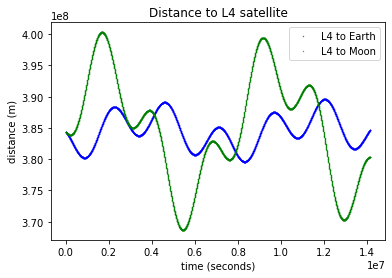

In [209]:
plot(tpoints,e4points, "b.", label="L4 to Earth", markersize=0.65)
plot(tpoints,m4points, "g.", label="L4 to Moon", markersize=0.65)
title("Distance to L4 satellite")
xlabel("time (seconds)")
ylabel("distance (m)")
legend()
show()